# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face detection
Task is to predict the boundaries(mask) around the face in a given image.

## Dataset
Faces in images marked with bounding boxes. Have around 500 images with around 1100 faces manually tagged via bounding box.

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Change current working directory to project folder (1 mark)

In [0]:
import os
os.chdir('/content/drive/My Drive/DLCP/Computer Vision W6 Project')

In [4]:
import tensorflow
print(tensorflow.__version__)

1.15.0


In [5]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.5'

### Load the "images.npy" file (4 marks)
- This file contains images with details of bounding boxes

In [6]:
%ls

images.npy     model-1.01.h5  model-1.06.h5  model-1.09.h5  model-1.33.h5
model-0.99.h5  model-1.02.h5  model-1.07.h5  model-1.30.h5  model-1.35.h5
model-1.00.h5  model-1.04.h5  model-1.08.h5  model-1.32.h5


In [7]:
ls -l images.npy

-rw------- 1 root root 1356868279 Jan 27 06:00 images.npy


In [0]:
import numpy as np
data = np.load('images.npy', allow_pickle=True)

In [9]:
data.shape

(409, 2)

### Check one sample from the loaded "images.npy" file  (4 marks)

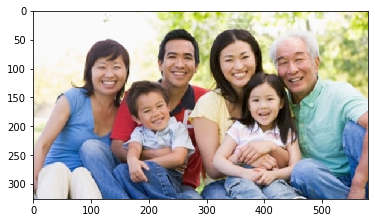

Label: [{'label': ['Face'], 'notes': '', 'points': [{'x': 0.5586206896551724, 'y': 0.19938650306748465}, {'x': 0.6603448275862069, 'y': 0.3773006134969325}], 'imageWidth': 580, 'imageHeight': 326}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.38620689655172413, 'y': 0.18711656441717792}, {'x': 0.4896551724137931, 'y': 0.4049079754601227}], 'imageWidth': 580, 'imageHeight': 326}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.1724137931034483, 'y': 0.23006134969325154}, {'x': 0.2775862068965517, 'y': 0.44171779141104295}], 'imageWidth': 580, 'imageHeight': 326}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.7155172413793104, 'y': 0.19938650306748465}, {'x': 0.8448275862068966, 'y': 0.41411042944785276}], 'imageWidth': 580, 'imageHeight': 326}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.2982758620689655, 'y': 0.44171779141104295}, {'x': 0.4189655172413793, 'y': 0.6533742331288344}], 'imageWidth': 580, 'imageHeight': 326}, {'label': ['Face'], 'notes': '', 'point

In [10]:
# Import the matplot library for visualizing the data
import matplotlib.pyplot as plt

plt.imshow(data[4][0], cmap='gray')
plt.show()
print('Label:', data[4][1])

# The image has 6 faces, label='Face' and for each of them the bounding box coordinates & height,width points are provided

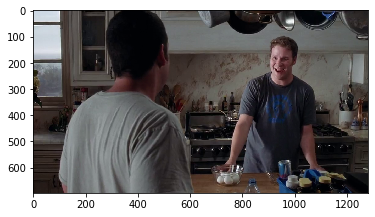

Label: [{'label': ['Face'], 'notes': '', 'points': [{'x': 0.7053087757313109, 'y': 0.23260437375745527}, {'x': 0.7692307692307693, 'y': 0.36182902584493043}], 'imageWidth': 1280, 'imageHeight': 697}]


In [11]:
# Just checking another image
plt.imshow(data[1][0], cmap='gray')
plt.show()
print('Label:', data[1][1])
# This image has only 1 face and the bbox coordinates & height,width points are provided

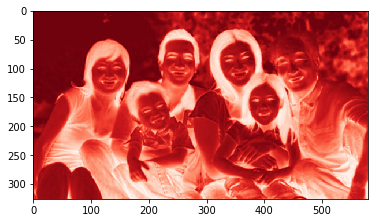

In [12]:
# Just experimenting...
# Check the shape of the image
data[4][0].shape

image = data[4][0]
red_image = image[:,:,0]
plt.imshow(red_image, cmap='Reds')
plt.show()

### Set image dimensions   (2 marks)
- Initialize image height, image width with value: 224 

In [0]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X_train" array
- Masks will be stored in "masks" array

In [0]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X_train = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X_train[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

### Print the shape of X_train and mask array  (1 mark)

In [15]:
X_train.shape

(409, 224, 224, 3)

In [16]:
masks.shape

(409, 224, 224)

### Print a sample image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 ...

 [[-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  ...
  [-0.96862745 -0.96862745 -0.96862745]
  [-0.96078432 -0.96078432 -0.96078432]
  [-0.96078432 -0.96078432 -0.96078432]]

 [

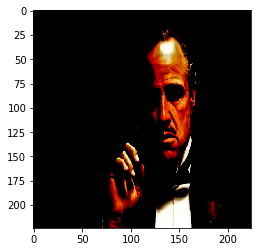

In [17]:
from matplotlib import pyplot
n = 10
print(X_train[n])
pyplot.imshow(X_train[n])

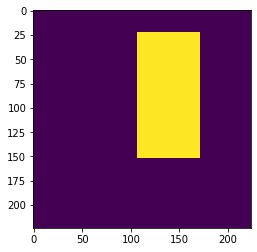

In [18]:
pyplot.imshow(masks[n])

## Create the model (10 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [0]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.models import Model

In [0]:
def create_model(trainable=True):
    # UNet Architecture derives its name from the way it is structured. 
    # In the Contraction half, it uses repeated Convolution and Downsampling to reduce the size of the image &
    # In the Expansive half, it uses repeated Upsampling & Concatenation to bring the image size back to the 224X224
    # We will use mobile net in the first phase and build our own layers for the second

    # Load the pretrained MobileNet
    # Mobilenet takes an image of size 224X224X3 and transforms it into 7X7X1024, it is initialized with ImageNet weights 
    model = MobileNet(input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH,3), include_top=False, alpha=1.0, weights='imagenet')

    # Set all existing layers to trainable
    for layer in model.layers:
        layer.trainable = trainable

    # Add all the UNET layers here
    # Upsampling doubles the size of the image, but does not change the number of channels
    # Concatenation does not change the size of the image, but adds the number of channels in the current layer and the next
    # The shape from the last layer of UNet model is (?, 7, 7, 1024)
    block3 = model.get_layer('conv_pw_13_relu').output  # model.layers[-1].output, last_layer.shape = (?, 7, 7, 1024)
    block2 = model.get_layer('conv_pw_11_relu').output
    block1 = model.get_layer('conv_pw_5_relu').output
    block0 = model.get_layer('conv_pw_3_relu').output
    block_1 = model.get_layer('conv_pw_1_relu').output

    x = concatenate([UpSampling2D()(block3), block2])
    print(x.shape)
    x = concatenate([UpSampling2D()(x), block1])
    print(x.shape)    
    x = concatenate([UpSampling2D()(x), block0])
    print(x.shape)
    x = concatenate([UpSampling2D()(x), block_1])
    print(x.shape)
    x = UpSampling2D()(x)
    print(x.shape)
    x = Conv2D(1, kernel_size=1, activation='sigmoid')(x)
    print(x.shape)
    x = Reshape((IMAGE_HEIGHT, IMAGE_WIDTH))(x)
    print(x.shape)
    
    return Model(inputs=model.input, outputs=x)

### Call the create_model function

In [21]:
# Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)
model = create_model(False)

# Print summary
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
17227776/17225924 [==============================] - 0s 0us/step
(?, 14, 14, 1536)
(?, 28, 28, 1792)
(?, 56, 56, 1920)
(?, 112, 112, 1984)
(?, 224, 224, 1984)
(?, 224, 224, 1)
(?, 224, 224)
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
_____________________

### Define dice coefficient function (5 marks)
- Create a function to calculate dice coefficient


In [0]:
from tensorflow.keras.backend import epsilon
from tensorflow import math
def dice_coefficient(y_true, y_pred):
  dice_coef = 2 * (math.reduce_sum(y_pred * y_true)) / (math.reduce_sum(y_pred + y_true) + epsilon())
  return dice_coef

### Define loss

In [0]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

### Compile the model (5 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [0]:
# Set the loss function, optimizer and performance metrics for model training
model.compile(loss=loss, optimizer='adam', metrics=[dice_coefficient])

### Define checkpoint and earlystopping

In [25]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", period=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

### Fit the model (5 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: checkpoint, reduce_lr, stop

In [0]:
batch_size = 1
epochs = 50

In [32]:
model.fit(X_train, masks,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          callbacks=[checkpoint, reduce_lr, stop])

Train on 409 samples
Epoch 1/50
407/409 [============================>.] - ETA: 0s - loss: 0.9822 - dice_coefficient: 0.5571
Epoch 00001: loss improved from 0.98647 to 0.98041, saving model to model-0.98.h5
409/409 [==============================] - 11s 27ms/sample - loss: 0.9804 - dice_coefficient: 0.5575
Epoch 2/50
407/409 [============================>.] - ETA: 0s - loss: 0.9666 - dice_coefficient: 0.5619
Epoch 00002: loss improved from 0.98041 to 0.96605, saving model to model-0.97.h5
409/409 [==============================] - 11s 27ms/sample - loss: 0.9660 - dice_coefficient: 0.5619
Epoch 3/50
407/409 [============================>.] - ETA: 0s - loss: 0.9624 - dice_coefficient: 0.5647
Epoch 00003: loss improved from 0.96605 to 0.96177, saving model to model-0.96.h5
409/409 [==============================] - 11s 27ms/sample - loss: 0.9618 - dice_coefficient: 0.5649
Epoch 4/50
407/409 [============================>.] - ETA: 0s - loss: 0.9608 - dice_coefficient: 0.5692
Epoch 00004: l

### Get the predicted mask for a sample image   (5 marks)

In [0]:
n = 10
sample_image = X_train[n]
region = model.predict(x=np.array([sample_image]))[0]

### Impose the mask on the image (5 marks)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


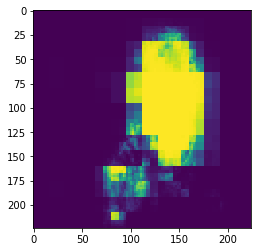

In [34]:
plt.imshow(sample_image)
plt.imshow(region)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


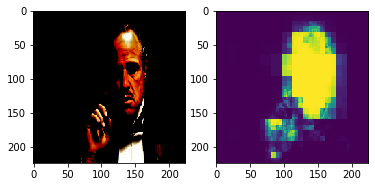

In [35]:
# Image and Mask seperately
plt.figure(1)
plt.subplot(1,2,1)
plt.imshow(sample_image)
plt.subplot(1,2,2)
plt.imshow(region)

As we can see, the model has correctly predicted the mask for Don Corleone's face.